 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [68]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [69]:
# Set the file paths
whale_data = Path("whale_returns.csv")
algo_data = Path("algo_returns.csv")
sp60_data = Path("sp_tsx_history.csv")

In [70]:
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp60_df = pd.read_csv(sp60_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [71]:
# Reading whale returns
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [72]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [73]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [74]:
# Reading algorithmic returns
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [75]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [76]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [77]:
# Reading S&P TSX 60 Closing Prices
sp60_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [78]:
# Check Data Types
sp60_df['Close'].dtypes

dtype('O')

In [79]:
# Fix Data Types
sp60_df['Close'] = sp60_df['Close'].str.replace('$','')
sp60_df['Close'] = sp60_df['Close'].str.replace(',','')
sp60_df['Close'] = sp60_df['Close'].str.replace('%','')

sp60_df['Close'] = sp60_df['Close'].astype(float)

C:\Users\Ksenija\AppData\Local\Temp/ipykernel_8312/958303453.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp60_df['Close'] = sp60_df['Close'].str.replace('$','')


In [80]:
# Calculate Daily Returns
sp60_daily_returns = sp60_df.pct_change()
sp60_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [81]:
# Check nulls
sp60_daily_returns.isnull().sum()

Close    1
dtype: int64

In [82]:
# Drop nulls
sp60_daily_returns = sp60_daily_returns.dropna()
sp60_daily_returns.isnull().sum()

Close    0
dtype: int64

In [83]:
# Rename `Close` Column to be specific to this portfolio.
sp60_daily_returns.rename({'Close': 'S&P TSX'}, axis=1, inplace=True)
sp60_daily_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [92]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

# Create a new DataFrame where the columns are the closing prices for each ticker
combined_df = pd.concat([whale_df, algo_df, sp60_daily_returns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df = combined_df.sort_index()

# Display a few rows
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily returns for all portfolios'}, xlabel='Date'>

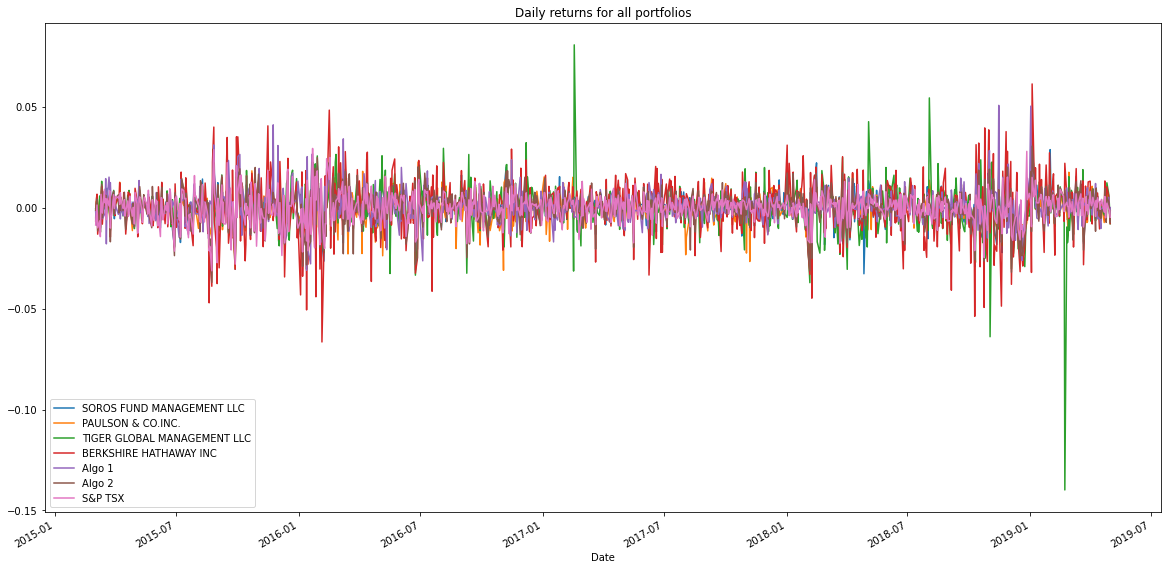

In [85]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20, 10), title="Daily returns for all portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns for all portfolios'}, xlabel='Date'>

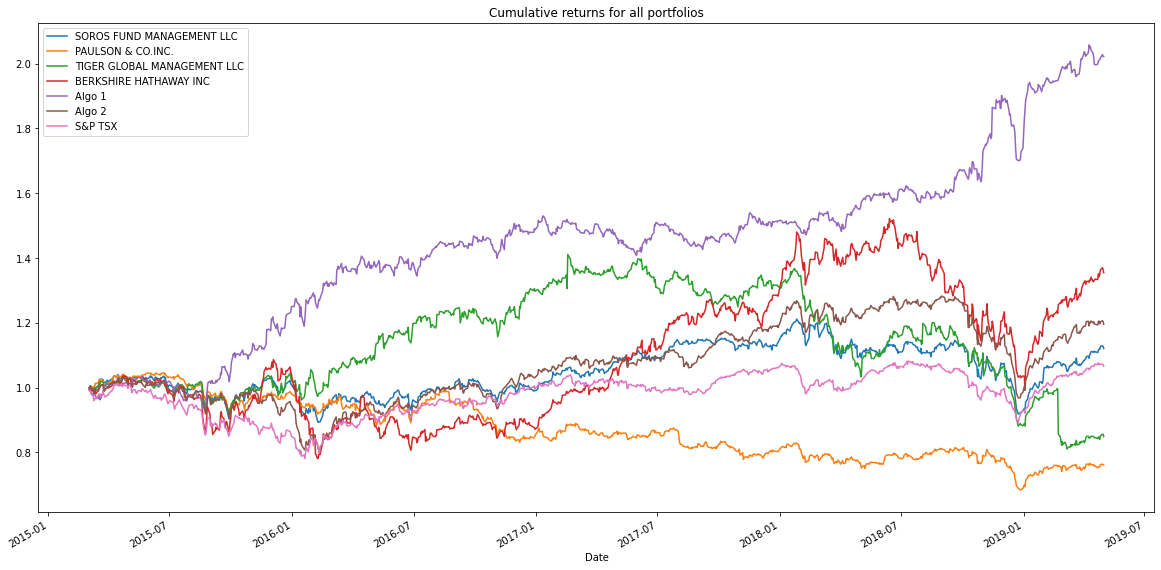

In [86]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative returns for all portfolios")

In [87]:
#Does any portfolio outperform the S&P TSX 60?
#Yes - most of the porfolio outperform S&P TSX 60, except Paulson & Co

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Boxplot for each portfolio'}>

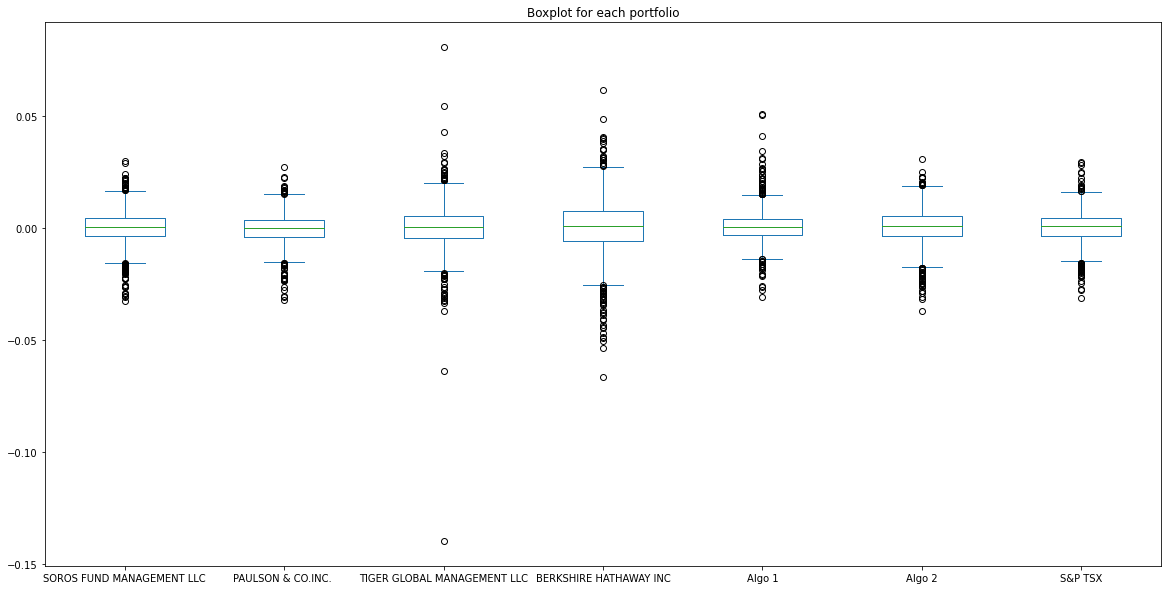

In [88]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20, 10),title='Boxplot for each portfolio')

### Calculate Standard Deviations

In [89]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = combined_df.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [93]:
# Calculate  the daily standard deviation of S&P TSX 60
sp60_daily_returns.std()
# Determine which portfolios are riskier than the S&P TSX 60
# All porfolios except Paulson & Co Inc are riskier than S&P TSX

S&P TSX    0.006637
dtype: float64

### Calculate the Annualized Standard Deviation

In [94]:
# Calculate the annualized standard deviation (252 trading days)
all_portfolio_ann_std = combined_df.std() * np.sqrt(252)
all_portfolio_ann_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Roling SD each portfolio'}, xlabel='Date'>

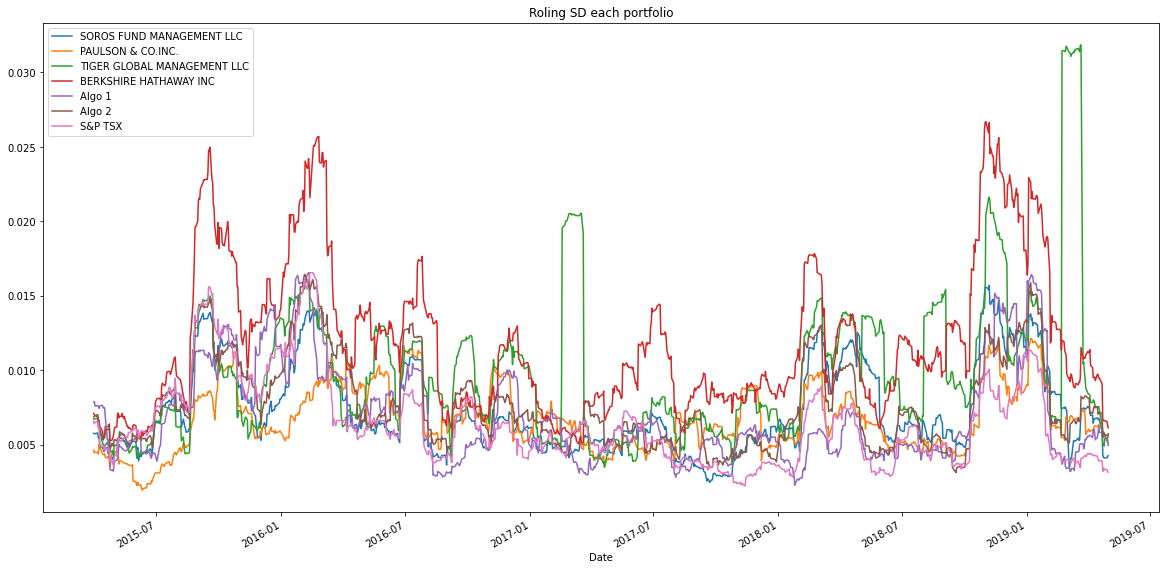

In [101]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
#rolling_std

# Calculate 30-day rolling variance of S&P 500
rolling_var = combined_df.rolling(window=30).var()
#rolling_var

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20, 10),title='Roling SD each portfolio')

### Calculate and plot the correlation

<AxesSubplot:>

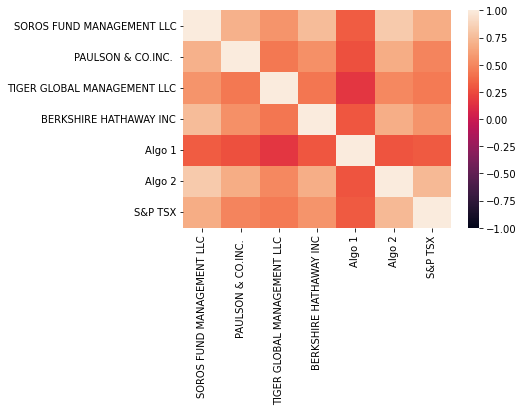

In [103]:
# Calculate the correlation
correlation = combined_df.corr()
#correlation
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

In [170]:
#Determine which portfolios may mimick the S&P TSX 60?
#Algo 2 seem to have the highest correlation with S&P TSX

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1 portfolio'}, xlabel='Date'>

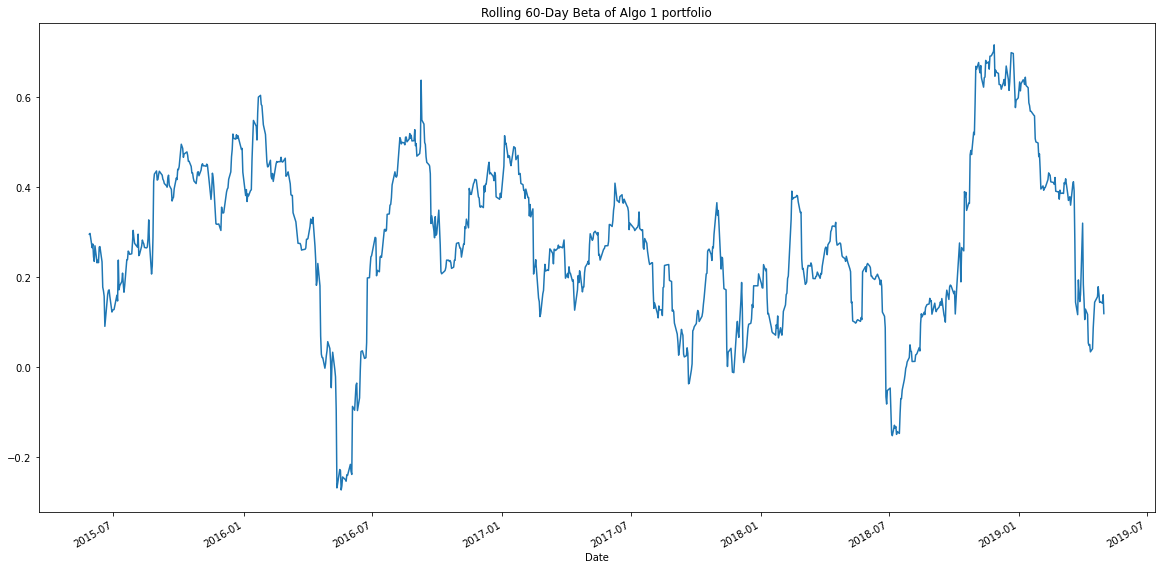

In [110]:
# Calculate covariance of a single portfolio
#60-day rolling beta for Algo 1 and S&P TSX

algo1_covariance = combined_df["Algo 1"].cov(combined_df["S&P TSX"])

rolling_algo1_covariance = combined_df["Algo 1"].rolling(window=60).cov(combined_df["S&P TSX"])

# Calculate variance of S&P TSX
sp60_variance = combined_df["S&P TSX"].var()

rolling_sp60_variance = combined_df["S&P TSX"].rolling(window=60).var()

# Computing beta
algo1_beta = algo1_covariance / sp60_variance

rolling_algo1_beta = rolling_algo1_covariance / rolling_sp60_variance

# Plot beta trend
rolling_algo1_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of Algo 1 portfolio")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

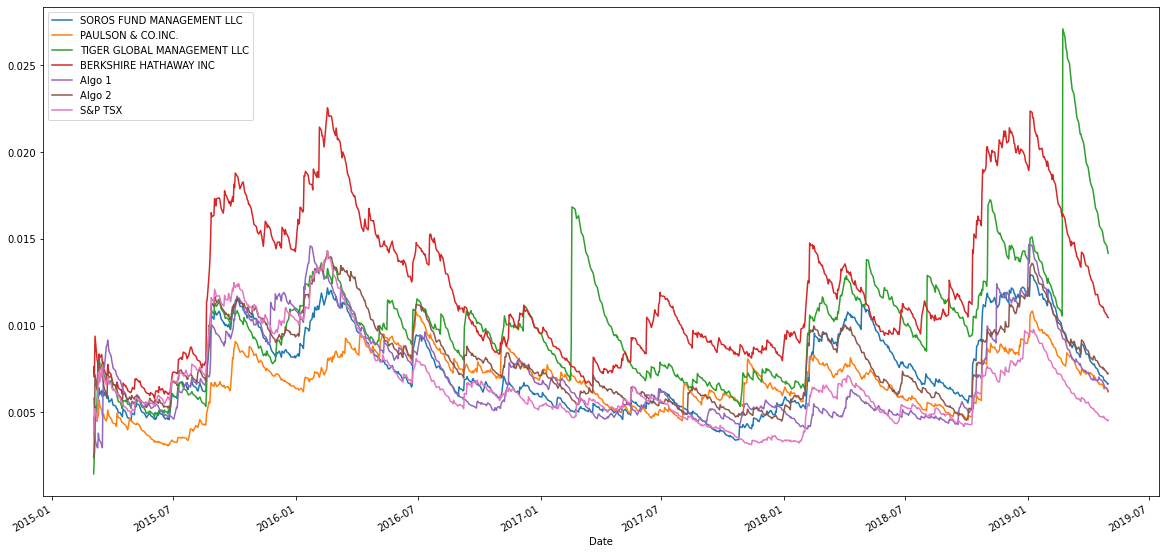

In [113]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [114]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

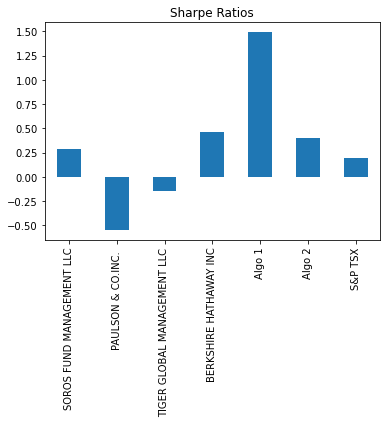

In [121]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Only Algo 1 and Bearkshire Hathway Inc outperformed the market, but overeall yes - algorithmic strategies outperformed whale and market portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [123]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

tickers = ['MRNA', 'DVN', 'CLR']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2021-01-01'
end_date = '2021-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('INPX', 'google', start_date, end_date)

NotImplementedError: data_source='google' is not implemented

In [ ]:
#Code doesnt seem to work so given stock options were used

In [139]:
# Reading data from 1st stock
# Loews stock info
l_data = Path("l_historical.csv")
l_df = pd.read_csv(l_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df.drop(columns=['Symbol'], axis=1, inplace = True)
l_df.rename({'Close': 'L'}, axis=1, inplace=True)
l_df.head()

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [138]:
# Reading data from 2nd stock
# Open text stock info
otex_data = Path("otex_historical.csv")
otex_df = pd.read_csv(otex_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df.drop(columns=['Symbol'], axis=1, inplace = True)
otex_df.rename({'Close': 'OTEX'}, axis=1, inplace=True)
otex_df.head()

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [140]:
# Reading data from 3rd stock
#Shopify stock info
shop_data = Path("shop_historical.csv")
shop_df = pd.read_csv(shop_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df.drop(columns=['Symbol'], axis=1, inplace = True)
shop_df.rename({'Close': 'SHOP'}, axis=1, inplace=True)
shop_df.head()

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [141]:
# Combine all stocks in a single DataFrame
combined_df2 = pd.concat([l_df,otex_df,shop_df], axis='columns', join='inner')
combined_df2.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [142]:
# Reset Date index
combined_df2.sort_index(inplace=True)
combined_df2.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [145]:
# Reorganize portfolio data by having a column per symbol
#Done in previouse steps
combined_df2.isnull().sum()

L       0
OTEX    0
SHOP    0
dtype: int64

In [148]:
# Calculate daily returns
daily_returns_df2 = combined_df2.pct_change()
daily_returns_df2.head()

# Drop NAs
daily_returns_df2 = daily_returns_df2.dropna()
daily_returns_df2.isnull().sum()

# Display sample data
daily_returns_df2.head()

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [154]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns_df2.dot(weights)
custom = pd.DataFrame(portfolio_returns)
#portfolio_returns.rename({'0': 'Weightet Return'}, axis=1, inplace=True)
# Display sample data
custom.head()

,0
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [156]:
# Join your returns DataFrame to the original returns DataFrame
combined_df3 = pd.concat([portfolio_returns, combined_df], axis='columns', join='inner')
combined_df3.rename(columns= {0: "Custom"},inplace = True )
combined_df3.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


In [157]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df3.dropna(inplace=True)
combined_df3.sort_index()
combined_df3.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [158]:
# Calculate the annualized `std`
combined_df3.std()
annualized_variance_df2 = (combined_df3.var()*252)
annualized_std_2 = np.sqrt(annualized_variance_df2)
annualized_std_2

Custom                         0.224346
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Roling SD each portfolio'}, xlabel='Date'>

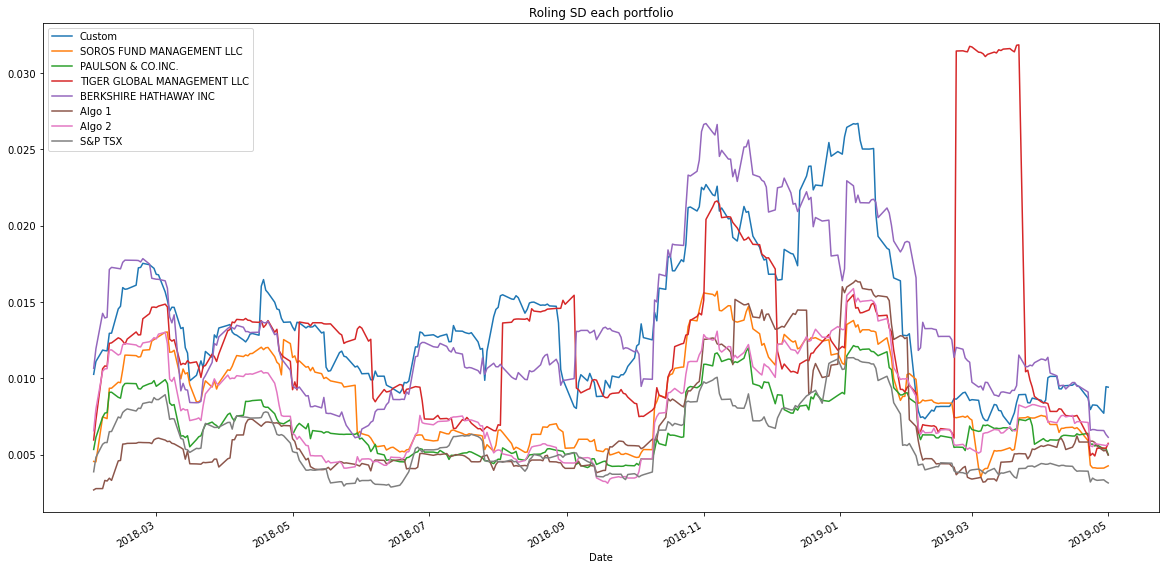

In [159]:
# Calculate rolling standard deviation
rolling_std_2 = combined_df3.rolling(window=21).std()

# Plot rolling standard deviation
combined_df3.rolling(window=21).std().plot(figsize=(20, 10),title='Roling SD each portfolio')

### Calculate and plot the correlation

<AxesSubplot:>

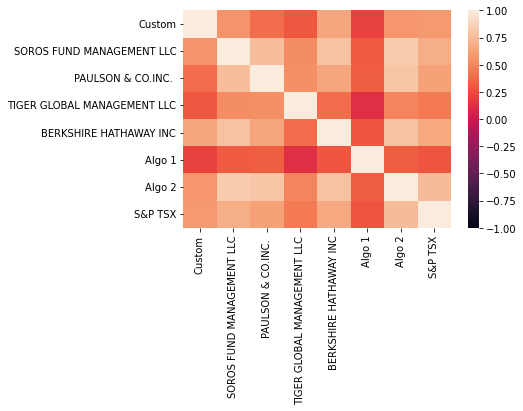

In [161]:
# Calculate and plot the correlation
correlation2 = combined_df3.corr()

# Display de correlation matrix

sns.heatmap(correlation2, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Custom Beta'}, xlabel='Date'>

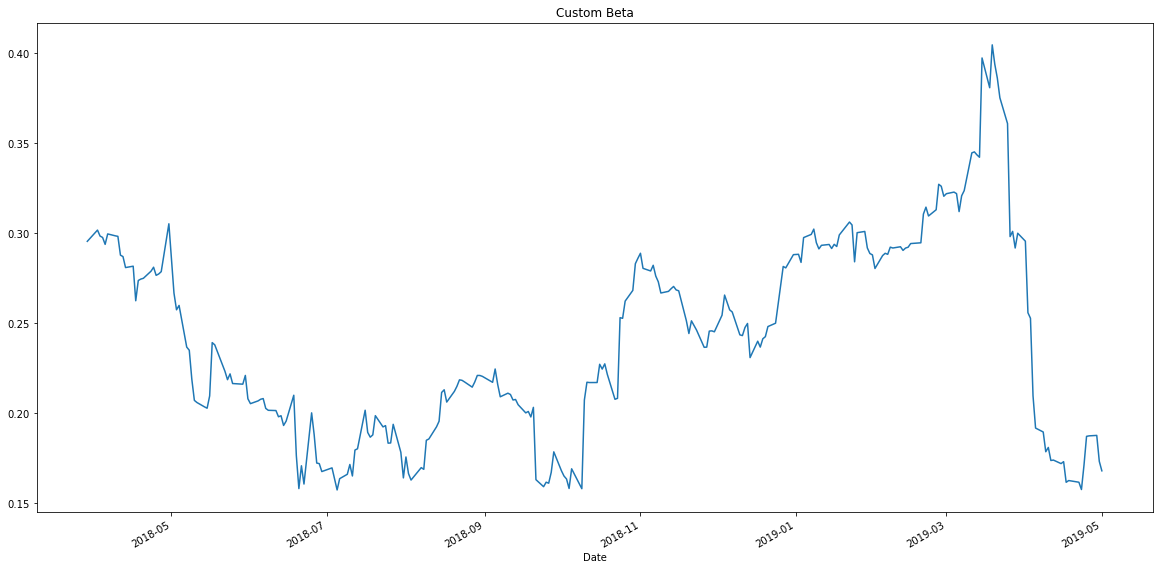

In [162]:
# Calculate and plot Beta
rolling_variance_2 = combined_df3['Custom'].rolling(window=60).var()
rolling_covariance_2 = combined_df3['Custom'].rolling(window=60).cov(combined_df3['S&P TSX'])
rolling_beta_2 = rolling_covariance_2 / rolling_variance_2
rolling_beta_2.plot(figsize=(20, 10), title='Custom Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [163]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_2 = (combined_df3.mean() * 252) / ((combined_df3).std() * np.sqrt(252))
sharpe_ratios_2

Custom                         1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios with new Custom portfolio'}>

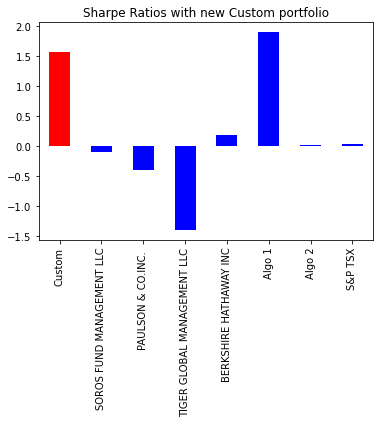

In [169]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind="bar", color=['red', 'blue', 'blue', 'blue', 'blue','blue','blue','blue'],title="Sharpe Ratios with new Custom portfolio")

### How does your portfolio do?

Write your answer here!

Custom portfolio proved to outperform all other portfolios, except Algo 1, but clearly better than  market and whale portfolios.